## Natural Intelligence Systems
### Data Scientist Technical Assessment
### Meghan Edgerton

### Part 2

For this task, the goal is to build a machine learning model to tackle the Sensorless Drive Diagnosis Dataset provided from the UCI Machine Learning Repository. This dataset consists of electric current drive signals, separated into 11 different classes by operating condition.

As a preliminary step, I started by importing the packages that would be required for this task. Additional modules were imported as I worked through this process. For simplicity, all of the necessary package and module imports are contained in the following cell.

In [15]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import os
from datetime import datetime

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,
accuracy_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score,precision_score

### Data Importing
The dataset was imported using the file path from the repository online. Since the original dataset did not include a header with column names, I renamed the first 48 columns as 'data #' and the last column as the target data. The output below is a preview of what the dataset looks like, showing the first ten rows and all of the columns.

In [16]:
datapath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00325/Sensorless_drive_diagnosis.txt'
file = os.path.basename(datapath)

cols = ["data " + str(i) for i in range(1,49)]
cols.append("target")
data = pd.read_csv(file,names = cols,sep=' ',header=0)

data.head(10)

,data 1,data 2,data 3,data 4,data 5,data 6,data 7,data 8,data 9,data 10,...,data 40,data 41,data 42,data 43,data 44,data 45,data 46,data 47,data 48,target
0,-3.014600e-07,8.260300e-06,-0.000012,-2.309800e-06,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-6.056100e-06,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-1.208400e-06,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-4.811100e-06,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-6.490100e-06,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1
5,-9.584900e-07,5.214300e-08,-0.000047,6.453700e-07,-2.304100e-06,0.000055,0.031154,0.031154,0.031201,-0.032789,...,-0.61124,5.8337,18.6970,-1.4956,-1.4956,-1.4956,-1.4973,-1.4972,-1.4973,1
6,-1.783700e-06,1.303600e-06,-0.000038,-7.083900e-06,6.706300e-06,0.000022,0.033805,0.033804,0.033841,-0.033345,...,-0.62501,17.6180,9.0823,-1.4960,-1.4960,-1.4959,-1.4954,-1.4954,-1.4953,1
7,-2.566600e-06,-1.679500e-07,0.000015,-1.598400e-06,8.709200e-07,0.000015,0.031071,0.031071,0.031056,-0.029695,...,-0.63618,12.8380,4.9079,-1.4990,-1.4990,-1.4990,-1.4968,-1.4968,-1.4968,1
8,-5.474000e-06,1.086500e-07,-0.000011,-1.815600e-06,4.757800e-07,0.000024,0.031309,0.031308,0.031319,-0.031344,...,-0.62465,2.9841,6.6883,-1.4955,-1.4955,-1.4955,-1.4947,-1.4947,-1.4947,1
9,2.825600e-06,6.067600e-06,0.000118,-4.347500e-06,1.492300e-06,-0.000003,0.030947,0.030941,0.030823,-0.032171,...,-0.58170,2.0511,8.8939,-1.4963,-1.4963,-1.4963,-1.4943,-1.4943,-1.4943,1


Next, I looked at the information of the imported dataset to ensure that it matched with the specifications that are given on the repository website.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
data 1     58509 non-null float64
data 2     58509 non-null float64
data 3     58509 non-null float64
data 4     58509 non-null float64
data 5     58509 non-null float64
data 6     58509 non-null float64
data 7     58509 non-null float64
data 8     58509 non-null float64
data 9     58509 non-null float64
data 10    58509 non-null float64
data 11    58509 non-null float64
data 12    58509 non-null float64
data 13    58509 non-null float64
data 14    58509 non-null float64
data 15    58509 non-null float64
data 16    58509 non-null float64
data 17    58509 non-null float64
data 18    58509 non-null float64
data 19    58509 non-null float64
data 20    58509 non-null float64
data 21    58509 non-null float64
data 22    58509 non-null float64
data 23    58509 non-null float64
data 24    58509 non-null float64
data 25    58509 non-null float64
data 26    58509 non-null float64
data 27

Even though the information given in the previous output states that the data in the columns were non-null, I wanted to confirm this. The output below gives the count of null values (NaNs) in each column of the DataFrame, as well as the total count of NaNs.

In [18]:
print(data.isnull().sum())
print('Total number of NaNs in the dataset: ', data.isnull().sum().sum())

data 1     0
data 2     0
data 3     0
data 4     0
data 5     0
data 6     0
data 7     0
data 8     0
data 9     0
data 10    0
data 11    0
data 12    0
data 13    0
data 14    0
data 15    0
data 16    0
data 17    0
data 18    0
data 19    0
data 20    0
data 21    0
data 22    0
data 23    0
data 24    0
data 25    0
data 26    0
data 27    0
data 28    0
data 29    0
data 30    0
data 31    0
data 32    0
data 33    0
data 34    0
data 35    0
data 36    0
data 37    0
data 38    0
data 39    0
data 40    0
data 41    0
data 42    0
data 43    0
data 44    0
data 45    0
data 46    0
data 47    0
data 48    0
target     0
dtype: int64
Total number of NaNs in the dataset:  0


Since it was confirmed that there are no NaNs contained in the DataFrame, I generated simple descriptive statistics of the dataset by column.

In [19]:
data.describe()

,data 1,data 2,data 3,data 4,data 5,data 6,data 7,data 8,data 9,data 10,...,data 40,data 41,data 42,data 43,data 44,data 45,data 46,data 47,data 48,target
count,58509.000000,5.850900e+04,5.850900e+04,58509.000000,5.850900e+04,5.850900e+04,58509.000000,58509.000000,58509.000000,58509.000000,...,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000,58509.000000
mean,-0.000003,1.439648e-06,1.412013e-06,-0.000001,1.351239e-06,-2.654483e-07,0.001915,0.001913,0.001912,-0.011897,...,-0.397757,7.293781,8.273772,-1.500887,-1.500912,-1.500805,-1.497771,-1.497794,-1.497686,6.000000
std,0.000072,5.555429e-05,2.353009e-04,0.000063,5.660943e-05,2.261907e-04,0.036468,0.036465,0.036470,0.066482,...,25.018728,12.451781,6.565952,0.003657,0.003668,0.003632,0.003163,0.003163,0.003175,3.162305
min,-0.013721,-5.414400e-03,-1.358000e-02,-0.012787,-8.355900e-03,-9.741300e-03,-0.139890,-0.135940,-0.130860,-0.218640,...,-0.902350,-0.596830,0.320660,-1.525500,-1.526200,-1.523700,-1.521400,-1.523200,-1.521300,1.000000
25%,-0.000007,-1.444400e-05,-7.239600e-05,-0.000005,-1.475300e-05,-7.379100e-05,-0.019927,-0.019951,-0.019925,-0.032144,...,-0.715470,1.450300,4.436300,-1.503300,-1.503400,-1.503200,-1.499600,-1.499600,-1.499500,3.000000
50%,-0.000003,8.804600e-07,5.137700e-07,-0.000001,7.540200e-07,-1.659300e-07,0.013226,0.013230,0.013247,-0.015566,...,-0.661710,3.301300,6.479100,-1.500300,-1.500300,-1.500300,-1.498100,-1.498100,-1.498000,6.000000
75%,0.000002,1.877700e-05,7.520000e-05,0.000004,1.906200e-05,7.138600e-05,0.024770,0.024776,0.024777,0.020614,...,-0.573980,8.288500,9.857500,-1.498200,-1.498200,-1.498200,-1.496200,-1.496300,-1.496200,9.000000
max,0.005784,4.525300e-03,5.237700e-03,0.001453,8.245100e-04,2.753600e-03,0.069125,0.069130,0.069131,0.352580,...,3670.800000,889.930000,153.150000,-1.457600,-1.456100,-1.455500,-1.337200,-1.337200,-1.337100,11.000000


From the descriptive statistics, it is noticeable that the attributes have a wide range of means, standard deviations, and quartiles. Also, it can be seen that some of the attributes' statistics have negative values, while others have positive values. This indicates the diversity of this dataset. 

I noticed that the column containing the target variable for this dataset consists of integers in the range of 1 to 11. From my understanding, each integer value represents a different operating condition. Looking at the descriptive statistics of the data helped me realize that the true goal of this task is classification. Now, I can narrow down what kind of model would be best to build for this dataset - a classifier that will work well with a large and diverse dataset.

### Separating the data into attribute and target variable sets

The original dataset is then separated into two datasets: one containing the attributes, and the other containing the target variable. Additionally, I checked to make sure that the dimensions of these datasets looked accurate.

In [20]:
ncols = len(data.columns)
nattr = ncols - 1

target_column = 49

X = data.iloc[:,0:48]
y = data.iloc[:,48]

print('Dataset shape: ',data.shape,'X shape: ', X.shape,'y shape: ', y.shape)

Dataset shape:  (58509, 49) X shape:  (58509, 48) y shape:  (58509,)


## Data Visualization

The next step in this process is visualizing the data. I did this by generating histograms, boxplots, and a correlation matrix for the attributes. I defined the parameters for the visualizations below, to create 48 plots of each type first.

In [21]:
# Setting the parameters for data visualization
display_cols = 4
display_rows = 12

figsize = plt.rcParams["figure.figsize"]
figsize[0] = display_cols*4
figsize[1] = display_rows*4
plt.rcParams["figure.figsize"] = figsize

### Histograms of the Attributes

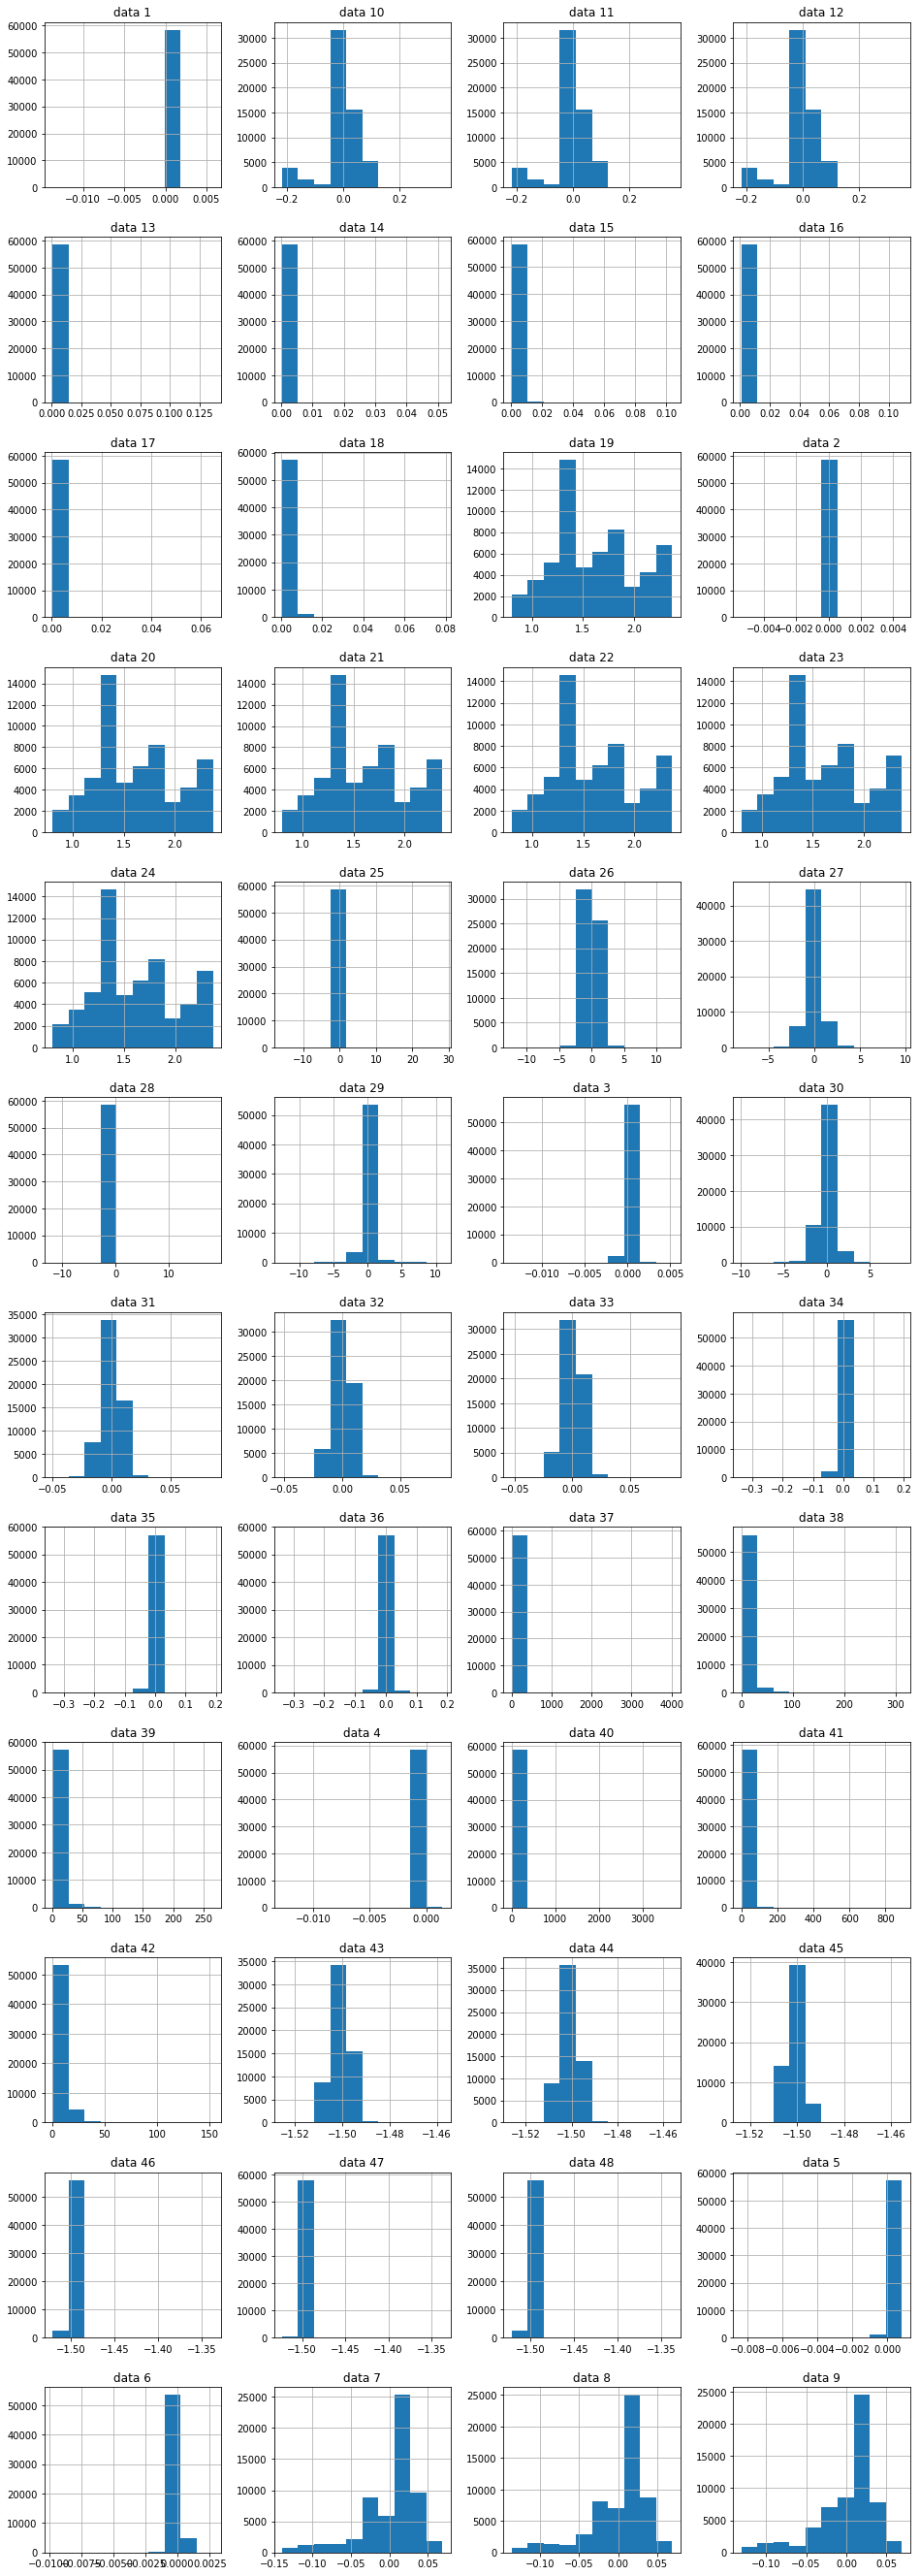

In [22]:
X.hist(layout=(display_rows,display_cols))
plt.show()

### Boxplots of the Attributes

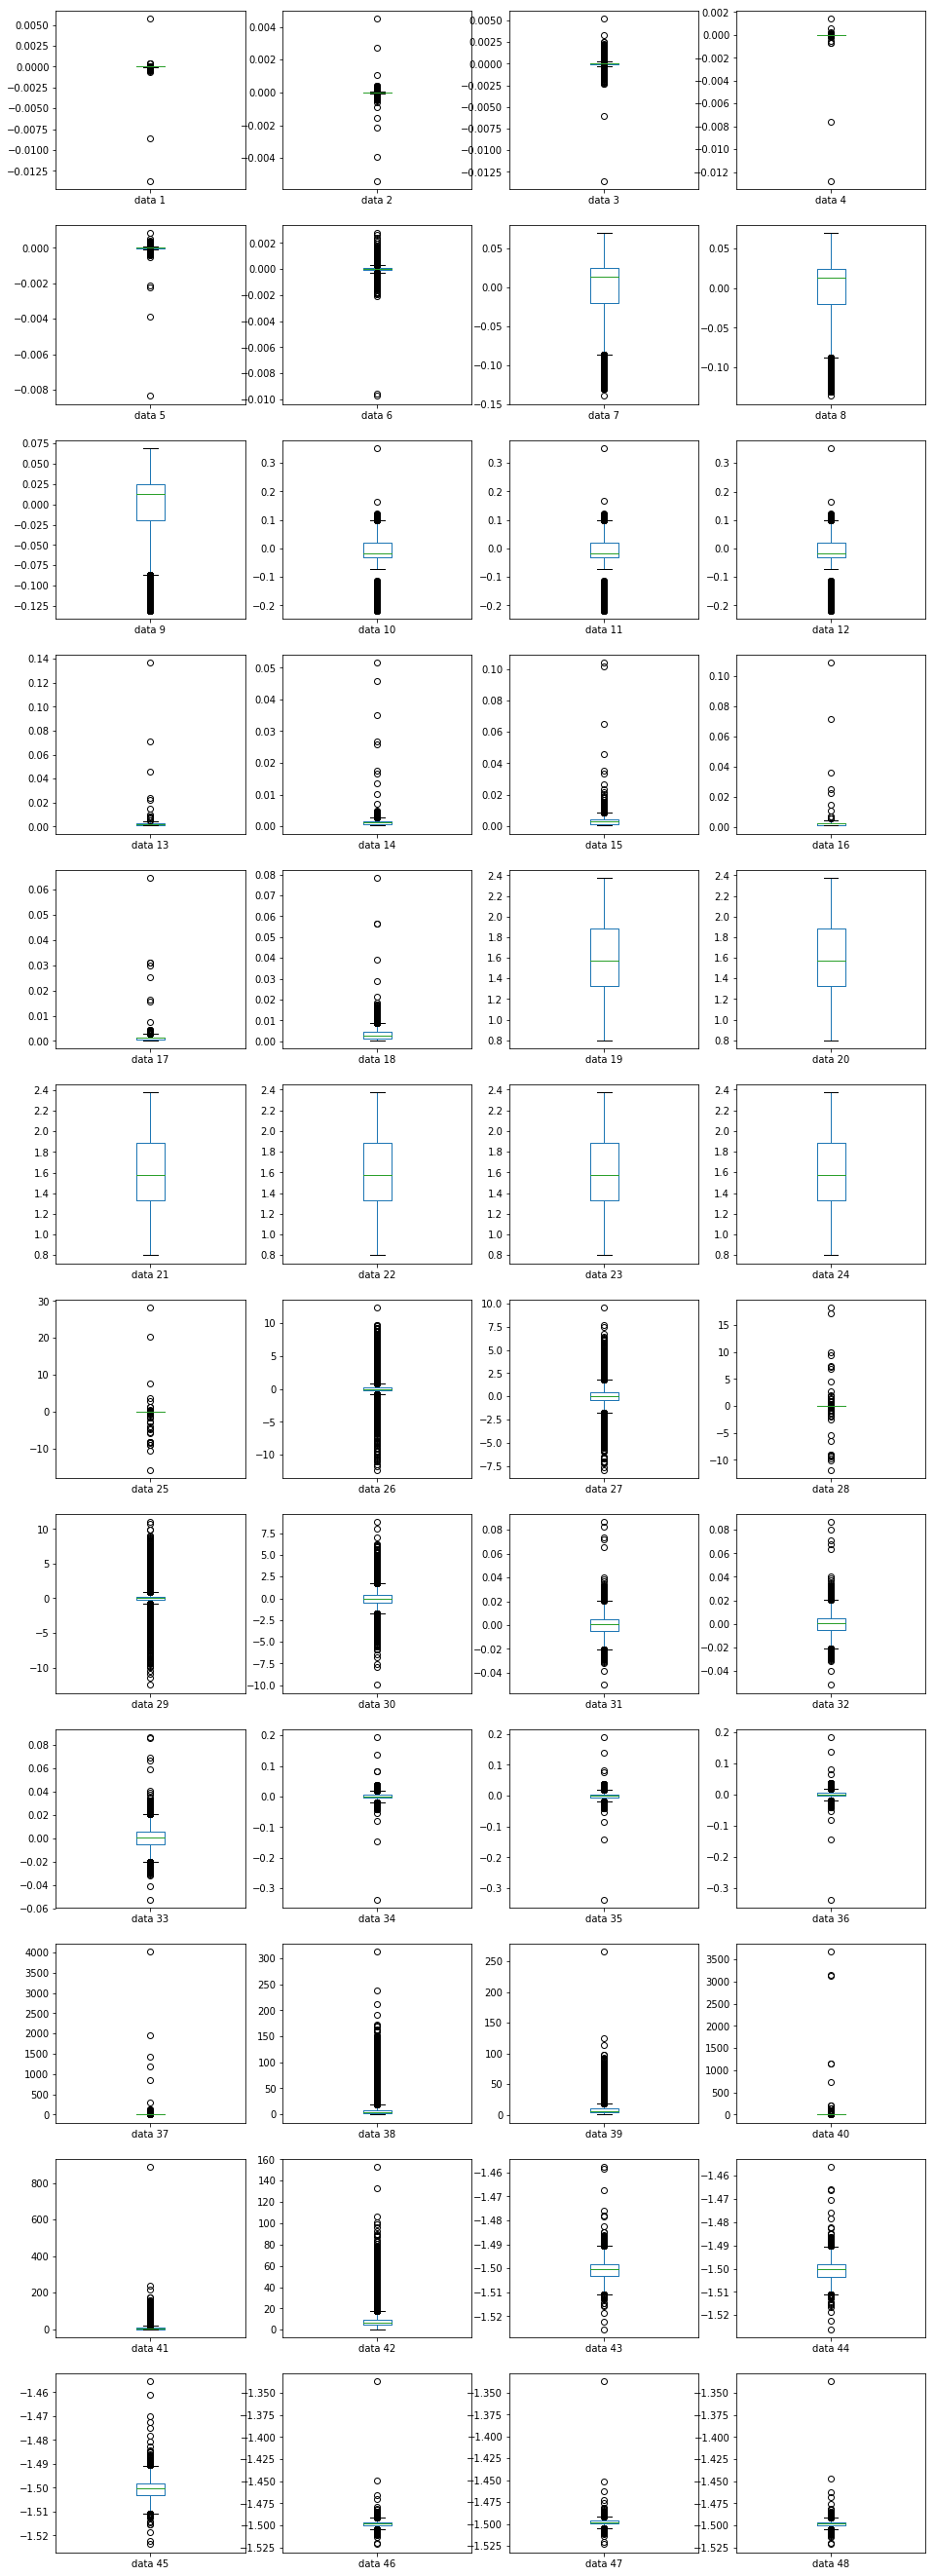

In [23]:
X.plot(kind='box', subplots=True,layout=(display_rows,display_cols))
plt.show()

From the histograms, it can be seen that the scales for the x-axis vary substantially. The boxplots show varying axes as well as several outliers for most of the attributes. This proves the need for preprocessing before the data can be split for training and testing. 

Next, I generated a correlation matrix to give more insight on the relationships between the attributes. 

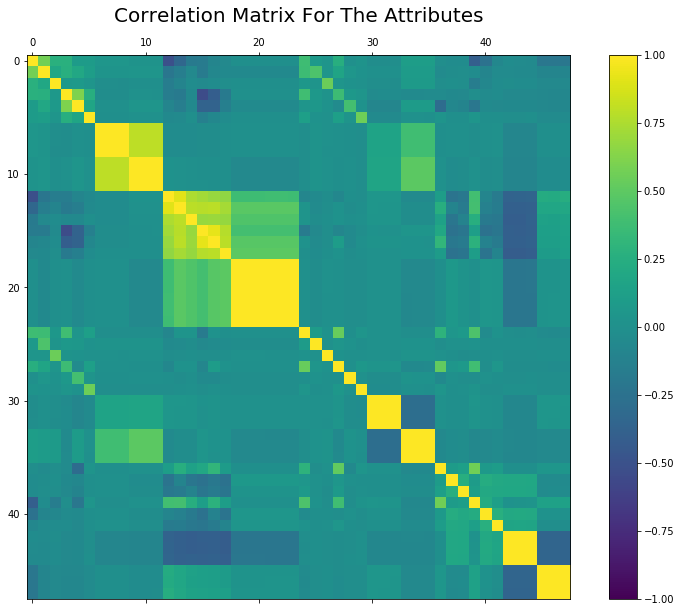

In [24]:
figure = plt.figure(figsize=(14,10))
axs = figure.add_subplot(111)
correlations = X.corr(method='pearson')
c_axs = axs.matshow(correlations,vmin=-1,vmax=1)
figure.colorbar(c_axs)
axs.set_title('Correlation Matrix For The Attributes', fontsize=20)
plt.show()

In the correlation matrix above, the color bar on the right side of the figure provides a key of the colors and their respective correlation coefficients. Since the majority of the matrix has the color range of coefficients close to zero, this indicates that there are fairly weak relationships between the attributes with a few exceptions.

## Data Preprocessing 

From the summaries and visualizations of the data, it is apparent that the data must be preprocessed before training and testing.

Since the range of values in each attribute are so variable, I decided that the best way to preprocess the data would be to standardize the values. To do this, I used the preprocessing.scale() function in Scikit-learn, which standardizes the dataset along more common axes. Histograms of the attribrutes were generated once more to demonstrate this efficiency of this method. 

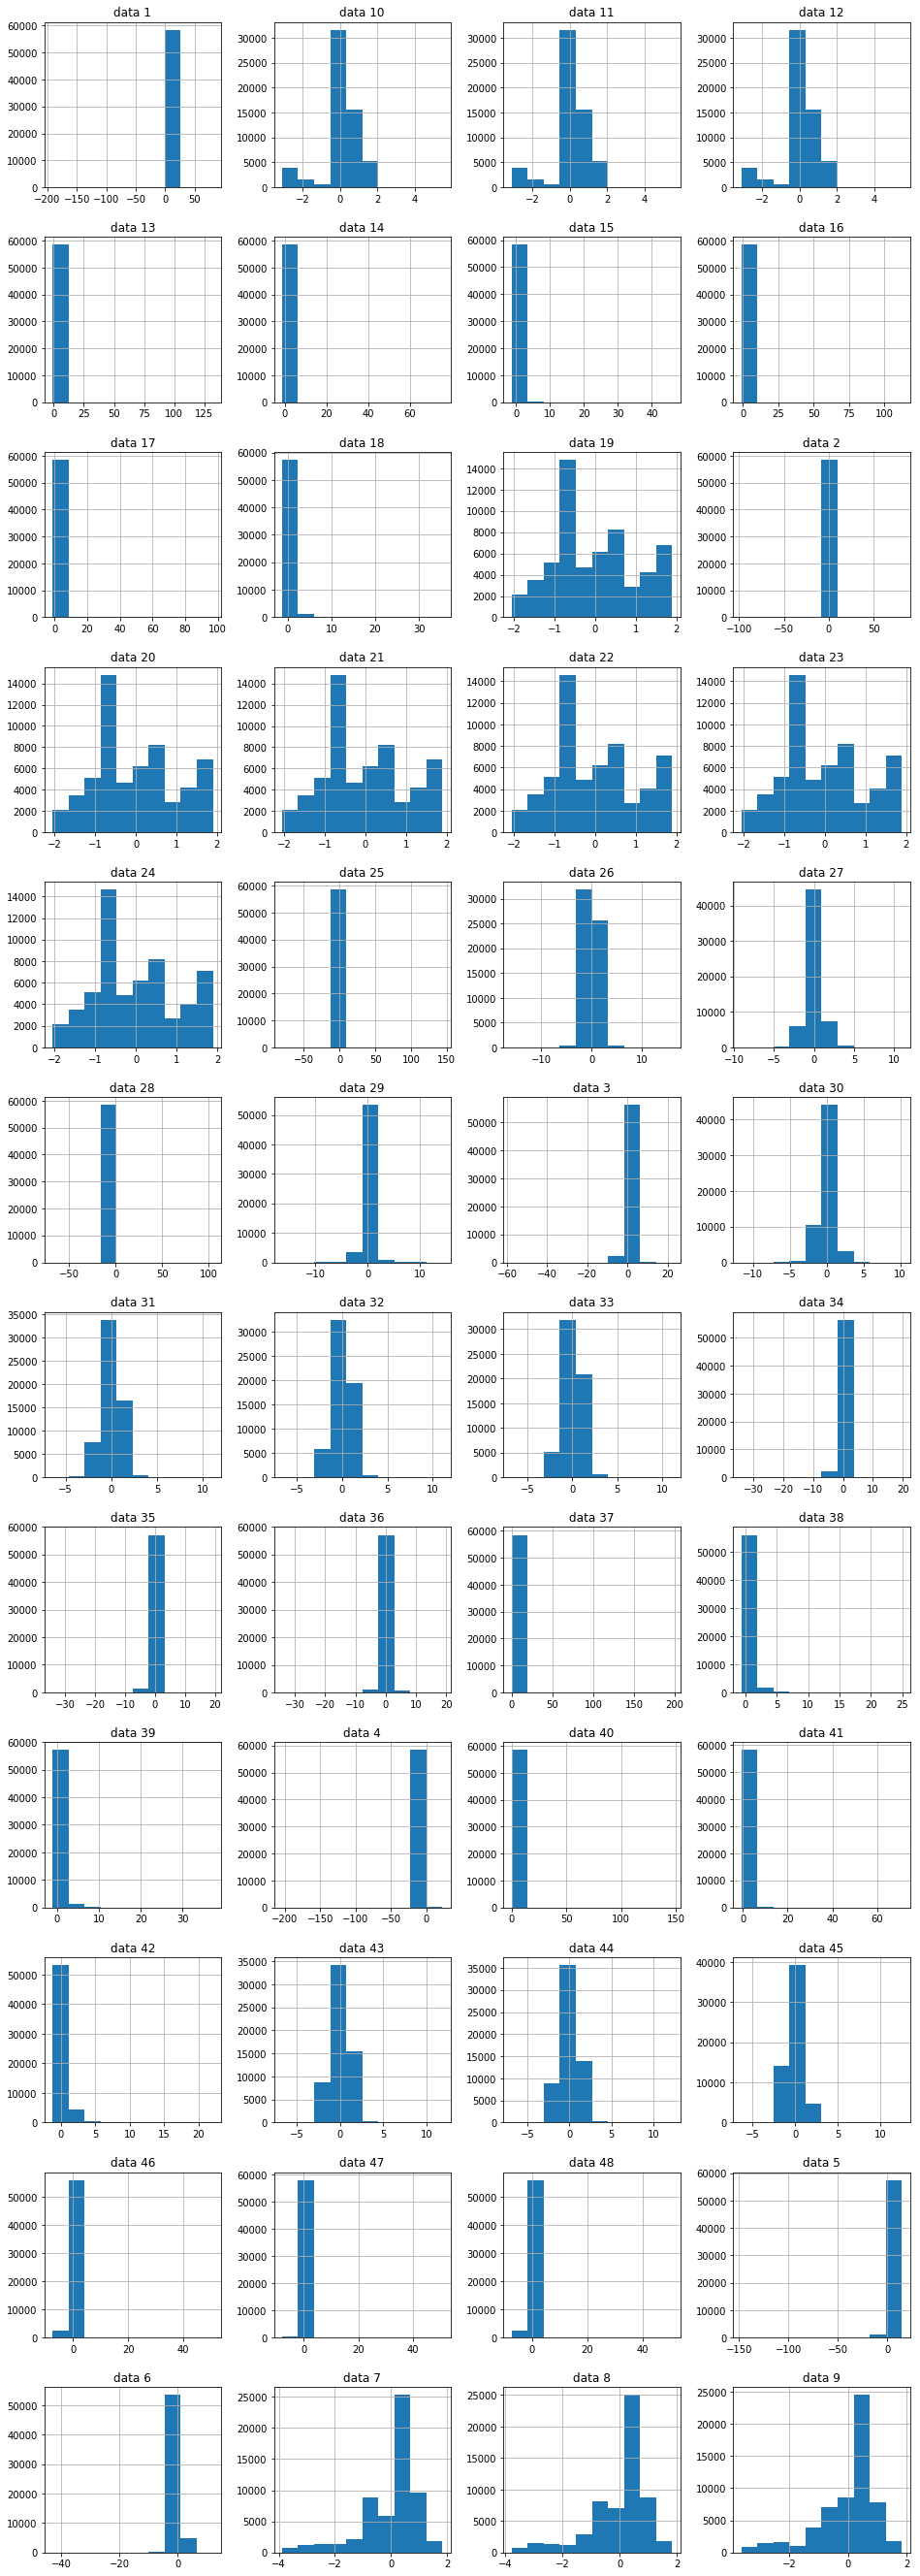

In [25]:
preprocessing.scale(X,copy=False)
X.hist(layout=(display_rows,display_cols))
plt.show()

## Data Splitting

After the preprocessing is done, the data is split into training and testing sets. This is done using Scikit-learn's train-test split function. For both the attributes and the target data, training and testing sets were made. Initially, I chose to use 67% of the data for training and the remaining 33% for testing and validation, to gauge how well the accuracy of the model would turn out to be. 

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.33)
print('Xtrain Shape: ',Xtrain.shape)
print('Xtest Shape: ',Xtest.shape)
print('ytrain Shape: ',ytrain.shape)
print('ytest Shape: ',ytest.shape)

Xtrain Shape:  (39201, 48)
Xtest Shape:  (19308, 48)
ytrain Shape:  (39201,)
ytest Shape:  (19308,)


## Training and Evaluating the Model

Now, the data is ready to be trained for a model. After researching different classifiers, I decided to use the Random Forest Algorithm for this dataset. I chose this particular algorithm because it works well with larger datasets that have a greater dimensionality, while still acheiving high accuracy with classification. Additonally, the Random Forest Algorithm works well to not overfit datasets that have a lot of variation (which is the case with the dataset being used).

To start implementation, I defined the model by setting a random number seed for the random state. For the cross validation of the model, I used a KFold with five folds and the shuffle parameter set to 'True' to increase randomization. The training data then was fit to the Random Forest model and used to predict the target variable. The accuracy, error, scoring standard deviation, precision score, and recall score were reported. 

In [27]:
start = datetime.now()
model = RandomForestClassifier(random_state=444)
kfold = KFold(n_splits = 5, random_state=444,shuffle=True)

model.fit(Xtrain,ytrain)
y_pred_test = model.predict(Xtest)

cval = cross_val_score(model,Xtrain,ytrain,cv=kfold,scoring='accuracy')

accuracy = cval.mean()*100
error = 100-accuracy
score_std = cval.std()*100
precision = precision_score(ytest,y_pred_test,average='macro')*100
recall = recall_score(ytest,y_pred_test,average='macro')*100
f1score = f1_score(ytest,y_pred_test,average='macro')*100

print('Scoring Accuracy: %.2f %%'%(accuracy))
print('Error: %.2f %%'%(error))
print('Scoring Standard Deviation: %.2f %%'%(score_std))
print('Precision: %.2f %%'%(precision))
print('Recall: %.2f %%'%(recall))
print('F1-Score: %.2f %%'%(f1score))
print('Model Training Time: ',(datetime.now() - start))

Scoring Accuracy: 99.82 %
Error: 0.18 %
Scoring Standard Deviation: 0.07 %
Precision: 99.81 %
Recall: 99.81 %
F1-Score: 99.81 %
Model Training Time:  0:01:32.919845


The precision score indicates the portion of the values that the model predicted correctly, the error shows the portion of the values that the model predicted incorrectly, the recall score is the ratio of the true positive values to the sum of true positive and false negative values, and the F1-score is the harmonic mean of the precision score and the recall score.


As can be seen from the results above, the model provided high precision, recall, and f1 scores. These metrics indicate that the model fits the dataset well, and is able to do a sufficient job in making predictions on new data.

## Model Tuning

In order to improve accuracy, I tuned the Random Forest model using 5 different parameters for the number of estimators with the GridSearchCV function in sklearn.model_selection. This will train the model for each different parameter value and determine the number of estimators that results in the best model accuracy. 

In [28]:
param = dict(n_estimators = np.array([50,100,150,200,250]))
model_2 = RandomForestClassifier(random_state= 444)
kfold = KFold(n_splits = 5, random_state = 444, shuffle = True)
grid = GridSearchCV(estimator = model_2, param_grid = param, scoring = 'accuracy', cv = kfold)
gridresult = grid.fit(Xtrain,ytrain)

print('Best Accuracy Acheived: ', gridresult.best_score_)
print(gridresult.best_params_)


Best Accuracy Acheived:  0.9982143345158494
{'n_estimators': 250}


After tuning, it was determined which number of estimators achieved the best accuracy. Displayed below is a table of the different parameters that were attempted and their respective accuracies.

In [29]:
means = []
stdevs = []
means = gridresult.cv_results_['mean_test_score']
stdevs = gridresult.cv_results_['std_test_score']
parameters = gridresult.cv_results_['params']
    
mean = np.array(means)
stdev = np.array(stdevs)
param = np.array(parameters)
tuning_results = np.vstack((mean,stdev,param)).transpose()
df_res = pd.DataFrame(tuning_results,columns = ['Mean Accuracy','Standard Deviation','Parameters'])
df_res = df_res.style.hide_index()
df_res

Mean Accuracy,Standard Deviation,Parameters
0.997781,0.000648374,{'n_estimators': 50}
0.998163,0.000746374,{'n_estimators': 100}
0.998061,0.000843761,{'n_estimators': 150}
0.998163,0.000710635,{'n_estimators': 200}
0.998214,0.000689239,{'n_estimators': 250}


Even though tuning the model didn't improve the accuracy a significant amount, it gave more information on how many estimators should be used to maximize the model's performance.

The high accuracy that came from using the Random Forest Algorithm shows that this model is appropriate to make accurate predictions for new data. So, the model is used with the testing data to make predictions.


## Final Model Evaluation

For the last step in this process, the model is redefined using the number of estimators that was deemed the best, re-fit to the data, and evaluated to make predictions. 

In [30]:
model = RandomForestClassifier(n_estimators = 200, random_state = 444)
model.fit(Xtrain,ytrain)
x_pred = model.predict(Xtest)
accuracy = accuracy_score(ytest,x_pred)
print('Accuracy: ',accuracy)
CM = confusion_matrix(ytest,x_pred)
print(CM)

Accuracy:  0.9980836958773566
[[1769    0    0    0    0    1    0    0    0    0    0]
 [   0 1734    1    0    0    0    0    0    1    4    1]
 [   0    0 1738    0    1    0    0    0    0    0    0]
 [   0    0    0 1747    1    0    0    0    0    0    0]
 [   0    0    2    3 1759    0    0    6    0    0    0]
 [   0    0    0    0    0 1743    0    0    2    0    0]
 [   0    0    0    1    0    0 1811    0    0    0    0]
 [   0    0    0    2    0    0    0 1740    0    0    0]
 [   0    4    0    0    0    1    0    1 1732    2    0]
 [   0    3    0    0    0    0    0    0    0 1726    0]
 [   0    0    0    0    0    0    0    0    0    0 1772]]


After tuning the model, the accuracy score produced from the final model fit has improved. To provide further insight into the model's performance, I generated a confusion matrix, where the rows and columns represent the 11 different classes in the original dataset. The confusion matrix shows the number of correctly predicted values in the diagonal of the matrix, and the number of incorrectly predicted values in the other rows and columns.

Overall, it can be concluded that the Random Forest Algorithm did a very good job of predicting the Sensorless Drive Diagnosis Data. There is sufficient evidence to say that if given more unseen data of drive signals, this model would be able to classify which condition class they belong to.